### Set up instructions for Datalab docker image

`git clone https://github.com/ESA-Datalabs/Cutana.git`

`conda activate cutana && pip install .`


In [ ]:
# UI-based start
import cutana_ui

app = cutana_ui.start()

In [ ]:
from cutana import get_default_config, Orchestrator

# Configure processing
config = get_default_config()
config.source_catalogue = "/media/team_workspaces/AnomalyMatch/cutana-test-cats/cutana_input.csv"
config.output_dir = "../cutana_output_files/backend_test"  # Where things go
config.output_format = "zarr"
config.target_resolution = 64  # Target resolution in pixels for the created cutouts
config.console_log_level = "WARNING"  # Set to INFO for more insight on what's going on
# Extensions to process , here we only do VIS, could be e.g. ["VIS", "NIR-H"], has to match fits order
# 1 output channel for VIS, details explained below
config.selected_extensions = ["VIS"]
# Manually define weights for channel blending, order has to match selected_extensions and fits
config.channel_weights = {
    "VIS": [1.0],
}

# Process cutouts
orchestrator = Orchestrator(config)
results = orchestrator.run()

In [ ]:
# Get sources info for a tile
import pandas as pd

# Each created batch / zarr has their metadata saved in a parquet file
metadata = pd.read_parquet(
    "../cutana_output_files/20250926_074129/batch_cutout_process_000_8f9c79fc/images_metadata.parquet"
)
metadata.head()

,source_id,ra,dec,diameter_arcsec,diameter_pixel,processing_timestamp
0,TILE_102018666_-578657393508576572,57.865739,-50.857657,None,1636,1.758873e+09
1,TILE_102018666_-577773253509707420,57.777325,-50.970742,None,1268,1.758873e+09
2,TILE_102018666_-579046864511758236,57.904686,-51.175824,None,1264,1.758873e+09
3,TILE_102018666_-579313720511764299,57.931372,-51.176430,None,1080,1.758873e+09
4,TILE_102018666_-580960954510051966,58.096095,-51.005197,None,1014,1.758873e+09


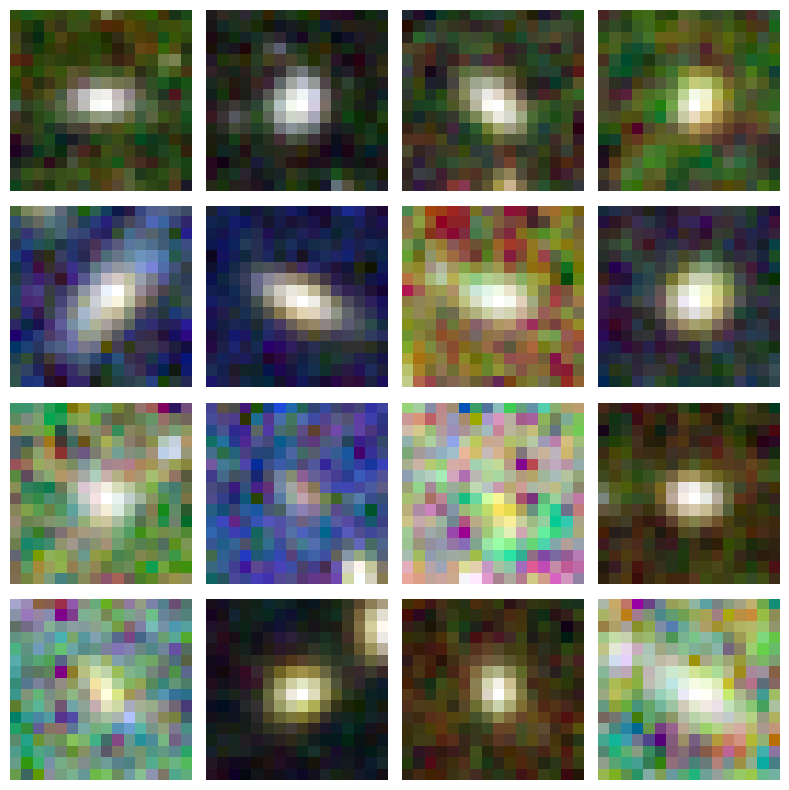

In [ ]:
# Have a look at zarr files directly
import zarr
from matplotlib import pyplot as plt
import numpy as np

file = zarr.open(
    "../cutana_output_files/20250926_074129/batch_cutout_process_000_8f9c79fc/images.zarr/",
    mode="r",
)


# Display 16 random images in a grid
fig, axes = plt.subplots(4, 4, figsize=(8, 8))
for ax in axes.flatten():
    image = file["images"][np.random.randint(0, file["images"].shape[0])]
    ax.imshow(image)
    ax.axis("off")
plt.tight_layout()
plt.show()